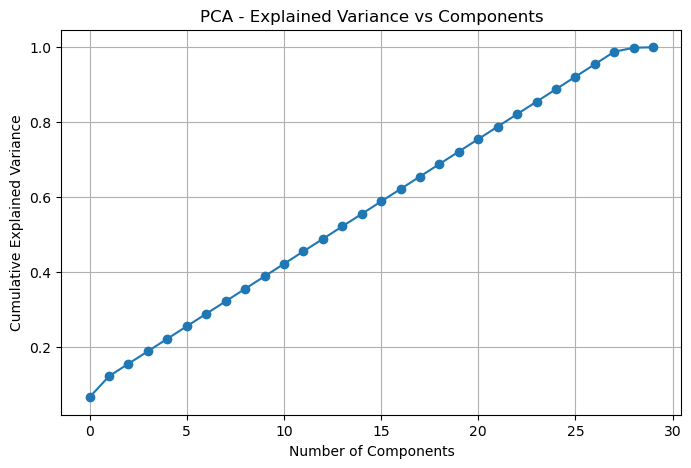

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

file_path = '/Users/anirudhravipudi/Desktop/AI/Practice/creditcard.csv'
df = pd.read_csv(file_path)

X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs Components')
plt.grid(True)
plt.show()

In [5]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [15]:
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 📂 Load the data
file_path = '/Users/anirudhravipudi/Desktop/AI/Practice/creditcard.csv'
df = pd.read_csv(file_path)

# 🎯 Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# ⚖️ Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔁 Apply PCA with 95% variance retained
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Number of components retained: {X_pca.shape[1]}")

# 🧪 Isolation Forest with PCA (0.95)
iso_forest = IsolationForest(n_estimators=100, contamination=0.0017, random_state=42)
y_pred_iso = iso_forest.fit_predict(X_pca)
y_pred_iso = (y_pred_iso == -1).astype(int)

print("\n🔍 Isolation Forest (PCA 95%):")
print(classification_report(y, y_pred_iso))

# 🧪 Local Outlier Factor with PCA (0.95)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.0017)
y_pred_lof = lof.fit_predict(X_pca)
y_pred_lof = (y_pred_lof == -1).astype(int)

print("\n🔍 Local Outlier Factor (PCA 95%):")
print(classification_report(y, y_pred_lof))

Number of components retained: 27

🔍 Isolation Forest (PCA 95%):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.28      0.28      0.28       492

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807


🔍 Local Outlier Factor (PCA 95%):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807

